# Лабораторная работа №5
## Исследование вероятности экспозиции совместно с вероятностью блокировки на основе модели антенн
## Логинов Сергей
## НФИмд-01-22

Цель:
1. Исследование вероятности экспозиции на основе модели антенн.

Задание.

В условиях предыдущей лабораторной работы N4, на двух точках, между которыми производится проверка прямой видимости, формируется диаграмма направленности, задающаяся вектором направления и углом. Предполагается, что если для обеих из рассматриваемых точек вторая точка лежит внутри сектора, описанного вектором и углом и линия прямой видимости между ними не заблокирована, то точки находятся в области видимости друг друга.

При условии, что направление вектора диаграммы задается случайно равномерно распределенной величиной от 0 до 2 Pi, а угол является константой, определить находятся ли рассматриваемые точки в области видимости друг друга.

На основе 1000 реализаций определить вероятность нахождения точек в области видимости друг друга. Полученный результат сравнить с результатами математической модели.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math
from numpy.linalg import norm
from numpy import arccos, dot, pi, cross

guard_size = 10
lambd = 0.2 
r = 0.3 
distance = 3
list_point=np.array 

Создадим функции для отрисовки круга и для пуассоновского точечного процесса

In [29]:
def plot_circle(x,y,r):
    angles=np.linspace(0,2*np.pi,50)
    x_cir=x+r*np.cos(angles)
    y_cir=y+r*np.sin(angles)
    plt.plot(x_cir,y_cir,'b')

def poisson_point_process(lambda0,area_size): 
    N = np.random.poisson(lambda0*area_size**2)
    x = np.random.uniform(0,area_size,size=N)
    y = np.random.uniform(0,area_size,size=N)
    return x,y

Функция для нахождения координат зоны блокировки

Здесь мы работаем с заданным углом

Сначала находим промежуточный угол для нахождения первого перпендикуляра

Далее находим первый перпендикуляр

После этого находим противоположный первому перпендикуляр

В итоге имеем два прямых угла от нашей линии прямой видимости

В конце по известным формулам ищем координаты точек для построения прямоугольной зоны блокировки


In [30]:
def find_blocking_zone(x1,y1,x2,y2,angle,r):
    rotation1 = 2*np.pi - angle 
    rotation2 = np.pi/ 2 - rotation1 
    rotation3=rotation2 + np.pi 
    

    
    x_rectang_A=x1+ r*np.cos(rotation3)
    y_rectang_A=y1+ r*np.sin(rotation3)
    x_rectang_B=x1+ r*np.cos(rotation2)
    y_rectang_B=y1+ r*np.sin(rotation2)
    x_rectang_C=x2+ r*np.cos(rotation2)
    y_rectang_C=y2+ r*np.sin(rotation2)
    x_rectang_D=x2+ r*np.cos(rotation3)
    y_rectang_D=y2+ r*np.sin(rotation3)
    
    return x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C,y_rectang_C, x_rectang_D, y_rectang_D


Функия для нахождения расстояния от точки до вектора, определяем его по арккосинусу

In [31]:
def check_distance(A,B,C):
    CA=(C-A)/norm(C-A) 
    BA=(B-A)/norm(B-A) 
    CB=(C-B)/norm(C-B) 
    AB=(A-B)/norm(A-B) 
    
    if arccos(dot(CA,BA))>1:
        return norm(C-A)
    
    if arccos(dot(CB,AB))>1:
        return norm(C-B)
    
    return norm(cross(A-B,A-C))/norm(B-A) 


Функция для проверки блокировки

Если расстояние между прямой и точками-блокаторами не превышает радиуса окружности, то происходит блокировка

In [32]:
def check_block(x1,y1,x2,y2,x,y,r): 
    circle_point=[]
    point_1=[]
    point_2=[]
    point_1.extend([x1,y1]) 
    point_2.extend([x2,y2]) 
    
    for i in range(len(x)):
        circle_point.append([x[i],y[i]]) 
    
    for i in range(len(x)):
        if (np.round(check_distance(list_point(point_1), list_point(point_2), list_point(circle_point[i])),1)<=r): 
            return True

Выполняем необходимые для сценария функции и рисуем график

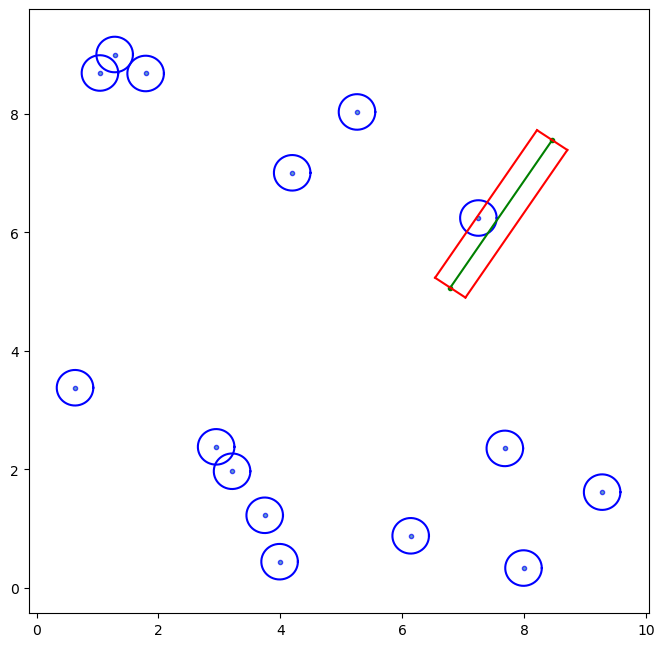

In [34]:
x, y=poisson_point_process(lambd, guard_size) 

x1 = np.random.uniform(0,guard_size) 
y1 = np.random.uniform(0,guard_size)

angle = np.random.uniform(0,2*np.pi) 

x2 = x1 + distance * np.cos(angle) 
y2 = y1 + distance * np.sin(angle)

x_rectang_A, y_rectang_A, x_rectang_B, y_rectang_B, x_rectang_C,y_rectang_C, x_rectang_D, y_rectang_D=find_blocking_zone(x1,y1,x2,y2,angle,r) #получение координат для отрисовки зоны блокировки вокруг отрезка


plt.figure(dpi=100, figsize=(8,8))
plt.plot(x,y,'.', alpha=0.7,label='fist',lw=5,mec='b') 
for i in range(len(x)):
    plot_circle(x[i],y[i], r)
plt.plot([x1,x2],[y1,y2], '.-g')
plt.plot([x_rectang_A,x_rectang_B],[y_rectang_A,y_rectang_B], 'r')
plt.plot([x_rectang_A,x_rectang_D],[y_rectang_A,y_rectang_D], 'r')
plt.plot([x_rectang_B,x_rectang_C],[y_rectang_B,y_rectang_C], 'r')
plt.plot([x_rectang_D,x_rectang_C],[y_rectang_D,y_rectang_C], 'r')
plt.show()

Проверка блокировки по секторам видимости

В ней мы находим угол поворота второй точки относительно первой

После корректируем значение на случай 3 и 4 четверти координатной окружности, если угол попадет в диапазон поворота, то видимость есть

In [8]:
def check_pol(line_d1, line_d2,distance,angle,fixang):
    x1, y1 = line_d1 
    x2, y2 = line_d2 
    
    atan1=math.atan2((y2-y1),(x2-x1))
    
    if atan1<0:
        atan1=2*np.pi+atan1 
    d1= atan1>angle and atan1<(angle+fixang)
    
    if d1==True:
        return True
    else:
        return False

Далее выполняем функции и другие действия для создания необходимого сценария, находим координаты линий-границ секторов видимости и строим график

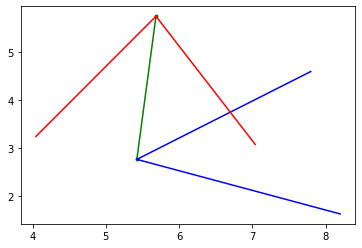

In [14]:
x1 = np.random.uniform(0,guard_size)
y1 = np.random.uniform(0,guard_size)

angle = np.random.uniform(0,2*np.pi)

x2 = x1 + distance * np.cos(angle)
y2 = y1 + distance * np.sin(angle)

angle1 = np.random.uniform(0,2*np.pi) 
angle2 = np.random.uniform(0,2*np.pi) 

distance1=np.random.uniform(distance, 1.5 * distance)
fixang=np.pi/3 

x31=x1+distance*np.cos(angle1)
y31=y1+distance*np.sin(angle1)
x41=x1+distance*np.cos(angle1+fixang)
y41=y1+distance*np.sin(angle1+fixang)

x32=x2+distance*np.cos(angle2)
y32=y2+distance*np.sin(angle2)
x42=x2+distance*np.cos(angle2+fixang)
y42=y2+distance*np.sin(angle2+fixang)

poll1 = check_pol([x1,y1], [x2,y2],distance1,angle1,fixang)
poll2 = check_pol([x2,y2], [x1,y1],distance1,angle2,fixang)
plt.plot([x1,x2],[y1,y2], '.-g') 
plt.plot([x1,x31],[y1,y31], 'b')
plt.plot([x1,x41],[y1,y41], 'b')
plt.plot([x2,x32],[y2,y32], 'r')
plt.plot([x2,x42],[y2,y42], 'r')
plt.show()

Здесь работаем с повторяющимся экспериментом, находим вероятность отсутствия блокировки сигнала, видимость достигается тогда, когда обе точки попадают в секторы видимости друг друга

In [35]:
num_experiments = 1000
s = 0
for i in range (num_experiments):
    x, y=poisson_point_process(lambd, guard_size)
    
    x1 = np.random.uniform(0,guard_size)
    y1 = np.random.uniform(0,guard_size)
    
    angle = np.random.uniform(0,2*np.pi)
    
    x2 = x1 + distance * np.cos(angle)
    y2 = y1 + distance * np.sin(angle)
    
    angle1 = np.random.uniform(0,2*np.pi)
    angle2 = np.random.uniform(0,2*np.pi)
    
    distance1=np.random.uniform(distance,1.5*distance)
    fixang=np.pi/4
    
    poll1 = check_pol([x1,y1], [x2,y2],distance1,angle1,fixang)
    poll2 = check_pol([x2,y2], [x1,y1],distance1,angle2,fixang)
    
    fl=True 
    
    if (check_block(x1,y1,x2,y2,x,y,r)):
        fl=False 
    
    if fl==True and poll1==True and poll2==True: 
        s+=1 
      
print('Вероятность видимости (экспериментальная) ', s/num_experiments)


Вероятность видимости (экспериментальная)  0.013


Аналитическая вероятность по формулам из лекций

In [36]:
s_B=2*r*distance
lambda1=lambd*s_B
p_block=1-math.exp(-lambda1)
print('Вероятность видимости (аналитическая) ',(1-p_block)*(fixang/(2*np.pi))**2)

Вероятность видимости (аналитическая)  0.01090119259485986
